In [2]:
!pip install transformers datasets sentence-transformers scikit-learn pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install huggingface_hub[hf_xet]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 MB 11.6 MB/s eta 0:00:00


In [4]:
!pip install kaggle

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d datafiniti/consumer-reviews-of-amazon-products --unzip --force


Dataset URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
License(s): CC-BY-NC-SA-4.0
  0% 0.00/16.3M [00:00<?, ?B/s]
100% 16.3M/16.3M [00:00<00:00, 995MB/s]


# **Import libraries**

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import pipeline
from datasets import Dataset

import torch
import random
from sentence_transformers import SentenceTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# **Load and preview dataset**

In [8]:

df = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [9]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [ ]:
df['reviews.rating'].value_counts()

,count
reviews.rating,
5,19897
4,5648
3,1206
1,965
2,616


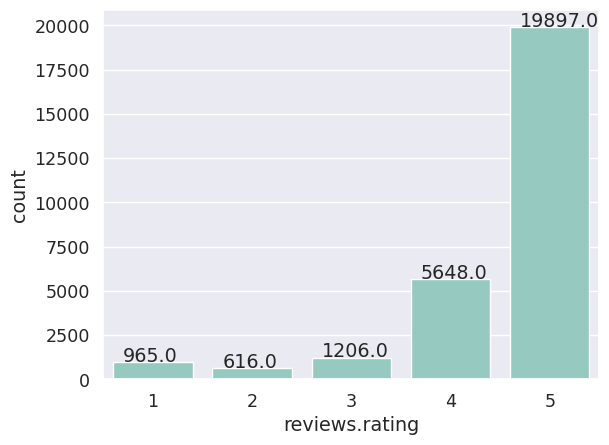

In [ ]:
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='reviews.rating',data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

# **Data Preprocessing**

In [25]:
df = df.rename(columns={
    'reviews.text': 'text',
    'reviews.rating': 'rating',
})
df['rating'] = df['rating'].astype(int)

In [ ]:
df.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
product_name,0
asins,0
brand,0
categories,0
category,0
imageURLs,0
keys,0


In [ ]:
def map_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['rating'].apply(map_sentiment)
df['label'] = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

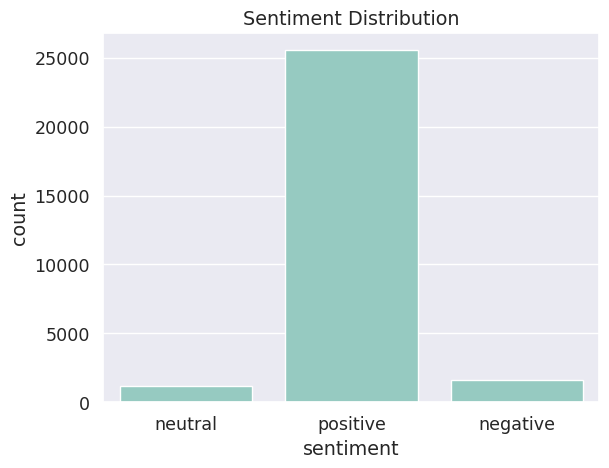

In [ ]:
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
df.sentiment.value_counts()

,count
sentiment,
positive,25545
negative,1581
neutral,1206


In [26]:
import re
import string

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


df['text'] = df['text'].apply(preprocess_text)


### **1. Review Classification**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import torch
from torch import nn
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer
from datasets import Dataset


class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['label']),
    y=df['label']
)
weights = torch.tensor(class_weights, dtype=torch.float)


class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fn = nn.CrossEntropyLoss(weight=weights.to(model.device))
        loss = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss


train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42, stratify=df['label']
)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-42-111f3eb58458>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,1.190500,1.032002
2,0.301000,0.782644
3,0.195700,0.927682


TrainOutput(global_step=8502, training_loss=0.8351385974203868, metrics={'train_runtime': 3950.1091, 'train_samples_per_second': 17.213, 'train_steps_per_second': 2.152, 'total_flos': 9007281400826880.0, 'train_loss': 0.8351385974203868, 'epoch': 3.0})

In [ ]:

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    report_to="none"
)


trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

trainer.train()


✅ Accuracy: 94.02%

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.68      0.71       316
     Neutral       0.45      0.40      0.42       241
    Positive       0.97      0.98      0.98      5110

    accuracy                           0.94      5667
   macro avg       0.72      0.69      0.70      5667
weighted avg       0.94      0.94      0.94      5667


🧮 Confusion Matrix Table:
          Negative  Neutral  Positive
Negative       214       51        51
Neutral         45       97        99
Positive        25       68      5017


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


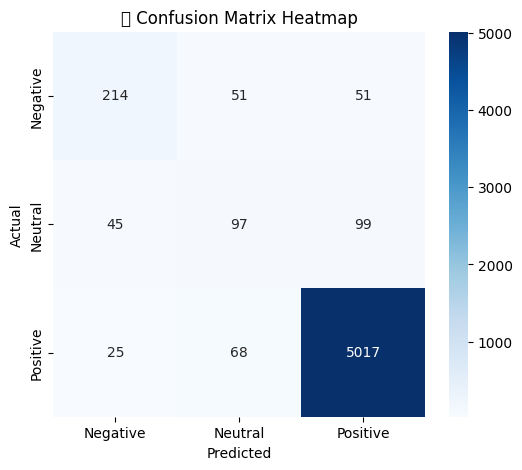

In [ ]:
preds = trainer.predict(val_dataset)
pred_labels = np.argmax(preds.predictions, axis=1)


acc = accuracy_score(val_labels, pred_labels)
print(f"✅ Accuracy: {acc*100:.2f}%\n")

# Classification report
report = classification_report(val_labels, pred_labels, target_names=["Negative", "Neutral", "Positive"], output_dict=True)
print("📊 Classification Report:")
print(classification_report(val_labels, pred_labels, target_names=["Negative", "Neutral", "Positive"]))

# Confusion matrix
cm = confusion_matrix(val_labels, pred_labels)
cm_labels = ["Negative", "Neutral", "Positive"]

# Tabular view
cm_df = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)
print("\n🧮 Confusion Matrix Table:")
print(cm_df)

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
trainer.save_model("./final_model")

tokenizer.save_pretrained("./final_model")

('./final_model/tokenizer_config.json',
 './final_model/special_tokens_map.json',
 './final_model/vocab.txt',
 './final_model/added_tokens.json',
 './final_model/tokenizer.json')

### **2. Product Category Clustering**

In [1]:

df = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df.head()

NameError: name 'pd' is not defined

In [14]:
products = df[['name', 'categories']]
products

,name,categories
0,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C..."
1,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C..."
2,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C..."
3,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C..."
4,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C..."
...,...,...
28327,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","Fire Tablets,Tablets,All Tablets,Amazon Tablet..."
28328,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","Fire Tablets,Tablets,All Tablets,Amazon Tablet..."
28329,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","Fire Tablets,Tablets,All Tablets,Amazon Tablet..."
28330,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","Fire Tablets,Tablets,All Tablets,Amazon Tablet..."


In [11]:
# products.drop_duplicates()

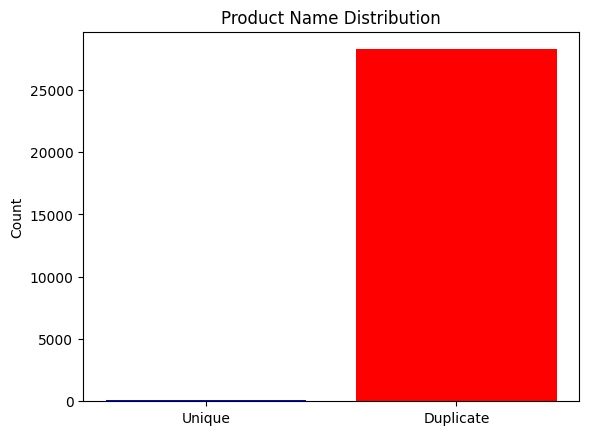

In [12]:

# Count unique and duplicate products
unique_count = df['name'].nunique()
duplicate_count = df['name'].duplicated().sum()

# Data for plotting
counts = [unique_count, duplicate_count]
categories = ['Unique', 'Duplicate']

# Plotting the valuation diagram
plt.bar(categories, counts, color=['blue', 'red'])
plt.title('Product Name Distribution')
plt.ylabel('Count')
plt.show()


In [46]:
product_texts = (products['name'] + " " + products['categories']).tolist()


In [47]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter

num_clusters=4

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(product_texts, show_progress_bar=True)

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)
products['cluster'] = clusters

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

Batches:   0%|          | 0/886 [00:00<?, ?it/s]

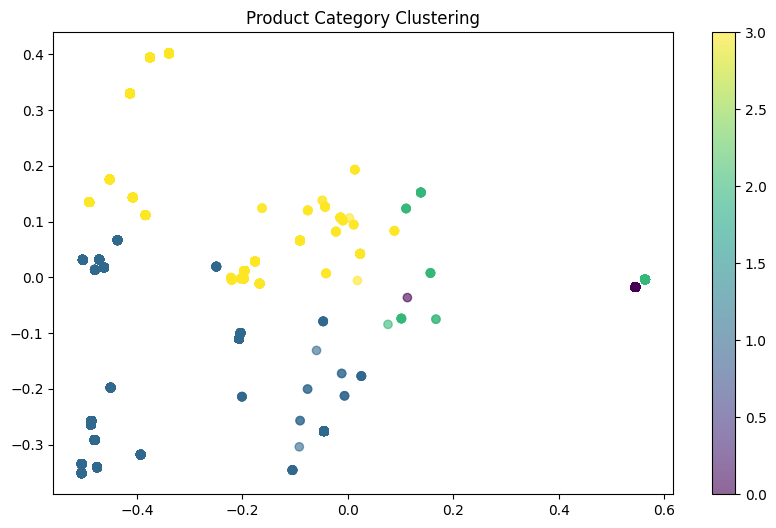

In [48]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1],
                      c=clusters, cmap='viridis', alpha=0.6)
plt.title('Product Category Clustering')
plt.colorbar(scatter)
plt.show()

In [49]:
cluster_summary = []
cluster_names = {}
for cluster_num in range(num_clusters):
    cluster_df = products[products['cluster'] == cluster_num]

    # Collect words
    words = []
    for name in cluster_df['name']:
        words += name.lower().split()

    # Get top 3 descriptive words (ignoring short ones)
    top_words = [word for word, count in Counter(words).most_common(10) if len(word) > 3][:3]
    label = ' '.join(top_words)
    cluster_names[cluster_num] = label

    # Sample product names
    sample_products = cluster_df['name'].sample(min(3, len(cluster_df))).tolist()
    samples_preview = ' | '.join(sample_products)

    # Append to summary list
    cluster_summary.append({
        'Cluster': cluster_num,
        'Label (Top Words)': label,
        'Count': len(cluster_df),
        'Sample Products': samples_preview
    })

summary_df = pd.DataFrame(cluster_summary)

summary_df

,Cluster,Label (Top Words),Count,Sample Products
0,0,amazonbasics performance alkaline,3729,AmazonBasics AA Performance Alkaline Batteries...
1,1,with special fire,9635,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue..."
2,2,amazonbasics performance alkaline,8373,AmazonBasics AAA Performance Alkaline Batterie...
3,3,"display, fire tablet,",6595,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include..."


In [50]:
product_to_cluster = dict(zip(products['name'], products['cluster']))
df['cluster'] = df['name'].map(product_to_cluster)
df['cluster_name'] = df['cluster'].map(cluster_names)
df['cluster_name'].value_counts()

,count
cluster_name,
amazonbasics performance alkaline,12102
with special fire,9635
"display, fire tablet,",6595


### **3. Review Summarization Using Generative AI**

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
!python -m textblob.download_corpora

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [51]:
from transformers import pipeline
from textblob import TextBlob
from collections import defaultdict
import pandas as pd
import textwrap
from tabulate import tabulate

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def generate_category_summaries(df):
    """Generate product summaries in table format"""
    summaries = {}

    for category in df['cluster_name'].unique():
        category_df = df[df['cluster_name'] == category]

        if len(category_df) < 10:
            continue

        product_stats = get_product_stats(category_df)
        if len(product_stats) < 3:
            continue

        top_products, worst_product = get_top_and_worst_products(product_stats)
        product_details = analyze_top_products(top_products)

        # Format as tables
        summary_tables = format_tables(category, product_details, worst_product)
        summaries[category] = summary_tables

    return summaries

def format_tables(category, product_details, worst_product):
    """Format all sections as tables"""
    tables = []

    # Top Products Table
    top_table = []
    for product in product_details:
        top_table.append([
            product['name'],
            f"★{product['rating']:.1f}",
            product['review_count'],
            "\n".join(product['pros']),
            "\n".join(product['cons'])
        ])

    tables.append({
        'section': f"TOP PRODUCTS IN {category.upper()}",
        'headers': ["Product", "Rating", "Reviews", "Pros", "Cons"],
        'data': top_table
    })

    # Key Differences Table
    common_pros = set(product_details[0]['pros'])
    for product in product_details[1:]:
        common_pros.intersection_update(product['pros'])

    diff_table = []
    for product in product_details:
        unique_pros = [p for p in product['pros'] if p not in common_pros]
        if unique_pros:
            diff_table.append([product['name'], ", ".join(unique_pros)])

    if diff_table:
        tables.append({
            'section': "KEY DIFFERENCES",
            'headers': ["Product", "Unique Features"],
            'data': diff_table
        })

    # Worst Product Table
    if not worst_product.empty:
        worst = worst_product.iloc[0]
        _, cons = analyze_sentiment(worst['reviews'])
        tables.append({
            'section': "PRODUCT TO AVOID",
            'headers': ["Product", "Rating", "Reasons to Avoid"],
            'data': [[
                worst_product.index[0],
                f"★{worst['avg_rating']:.1f}",
                ", ".join(cons[:3]) if cons else "Consistently poor ratings"
            ]]
        })

    return tables

def get_product_stats(category_df):
    """Calculate product statistics from dataframe"""
    stats = category_df.groupby('name').agg({
        'rating': ['mean', 'count'],
        'text': list
    })
    stats.columns = ['avg_rating', 'review_count', 'reviews']
    return stats[stats['review_count'] >= 5]  # Only include products with enough reviews

def get_top_and_worst_products(product_stats):
    """Identify best and worst performing products"""
    return (
        product_stats.nlargest(3, 'avg_rating'),
        product_stats.nsmallest(1, 'avg_rating')
    )

def analyze_top_products(top_products):
    """Extract pros/cons from top products' reviews"""
    product_details = []
    for product, row in top_products.iterrows():
        pros, cons = analyze_sentiment(row['reviews'])
        product_details.append({
            'name': product,
            'rating': row['avg_rating'],
            'review_count': row['review_count'],
            'pros': pros[:3] or ["no significant positive feedback"],
            'cons': cons[:3] or ["no major complaints"]
        })
    return product_details

def analyze_sentiment(reviews):
    """Perform sentiment analysis on reviews"""
    pros = defaultdict(int)
    cons = defaultdict(int)

    for review in reviews:
        blob = TextBlob(review)
        for sentence in blob.sentences:
            polarity = sentence.sentiment.polarity
            words = [word for word, tag in blob.tags
                    if tag in ('NN', 'NNS', 'JJ', 'JJR', 'JJS')]

            if polarity > 0.3:  # Positive
                for word in words:
                    pros[word] += 1
            elif polarity < -0.3:  # Negative
                for word in words:
                    cons[word] += 1

    # Filter and sort results
    pros_sorted = [k for k, _ in sorted(pros.items(), key=lambda x: -x[1])] if pros else []
    cons_sorted = [k for k, _ in sorted(cons.items(), key=lambda x: -x[1])] if cons else []

    return pros_sorted, cons_sorted

def build_summary_sections(category, product_details, worst_product):
    """Construct the structured summary sections"""
    sections = []

    # Category header
    sections.append(f"=== {category.upper()} ===")
    sections.append("\nTOP PRODUCTS:")

    # Top products
    for i, product in enumerate(product_details, 1):
        sections.append(
            f"\n{i}. {product['name']} (★{product['rating']:.1f}, {product['review_count']} reviews)"
            f"\n   ✓ Pros: {', '.join(product['pros'])}"
            f"\n   ✗ Cons: {', '.join(product['cons'])}"
        )

    # Key differences
    sections.append("\n\nKEY DIFFERENCES BETWEEN TOP PRODUCTS:")
    common_pros = set(product_details[0]['pros'])
    for product in product_details[1:]:
        common_pros.intersection_update(product['pros'])

    for product in product_details:
        unique_pros = [p for p in product['pros'] if p not in common_pros]
        if unique_pros:
            sections.append(f"- {product['name']} stands out for: {', '.join(unique_pros)}")

    # Worst product
    if not worst_product.empty:
        worst = worst_product.iloc[0]
        _, cons = analyze_sentiment(worst['reviews'])
        sections.append("\n\nPRODUCT TO AVOID:")
        sections.append(
            f"{worst_product.index[0]} (★{worst['avg_rating']:.1f})"
            f"\n   ‼ Reasons to avoid: {', '.join(cons[:3]) if cons else 'consistently poor ratings'}"
            f"\n   This product performs significantly worse than competitors in: "
            f"{cons[0] if cons else 'multiple aspects'}"
        )

    return sections

def generate_final_summary(full_text):
    """Generate concise summary using BART model"""
    input_length = len(full_text.split())
    return summarizer(
        full_text,
        max_length=min(300, int(input_length * 0.7)),
        min_length=min(150, int(input_length * 0.3)),
        do_sample=False,
        truncation=True
    )[0]['summary_text']

def print_readable_summaries(summaries):
    """Print formatted tables with borders"""
    for category, tables in summaries.items():
        print("\n" + "="*80)
        print(f"CATEGORY: {category.upper()}")
        print("="*80)

        for table in tables:
            print(f"\n{table['section']}")
            print(tabulate(
                table['data'],
                headers=table['headers'],
                tablefmt="grid",
                stralign="left",
                numalign="center"
            ))

        print("="*80)


summaries = generate_category_summaries(df)
print_readable_summaries(summaries)

Device set to use cuda:0



CATEGORY: AMAZONBASICS PERFORMANCE ALKALINE

TOP PRODUCTS IN AMAZONBASICS PERFORMANCE ALKALINE
+--------------------------------------------------------------------------------+----------+-----------+-----------+---------------------+
| Product                                                                        | Rating   |  Reviews  | Pros      | Cons                |
+================================================================================+==========+===========+===========+=====================+
| AmazonBasics 16-Gauge Speaker Wire - 100 Feet                                  | ★5.0     |     5     | great     | no major complaints |
|                                                                                |          |           | wires     |                     |
|                                                                                |          |           | feel      |                     |
+---------------------------------------------------------------